## ML for Asset Management - Marcos Lopez de Prado 

**Date:** 2025-06-03

### Section 8 - Test Set Overfitting

Monte Carlo simulations play in mathematics the analogue to a controlled experiment in the physical sciences.

A backtest is a historical simulation of how an investment strategy would have performed in the past. It is not a controlled experiment, because we cannot change the environmental variables to derive a new historical time series on which to perform an independent backtest.

It is easy for a researcher to overfit a backtest, by conducting multiple historical simulations, and selecting the best performing strategy.

When a researcher presents an overfit backtest as the outcome of a single trial, the simulated performance is inflated. This form of statistical inflation is called selection bias under multiple testing (SBuMT)

SBuMT is compounded by asset managers through sequential SBuMT at two levels: 
- (1) each researcher runs millions of simulations and presents the best (overfit) ones to her boss; 
- (2) the company further selects a few backtests among the (already overfit) backtests submitted by the researchers. 

We may call this backtest hyperfitting, to differentiate it from backtest overfitting.

In this section, we study how researchers can estimate the effect that SBuMT has on their findings.

#### 8.2 Precision and Recall

Consider $s$ investment strategies. Some of these are false discoveries, in the sense that their expected return is not positive. 

We can decompose these strategies into true and false: $s = s_T+s_F$. Let $\theta$ be the odds ratio of true strategies against false strategies: $\theta = \frac{s_T}{s_F}$.

In financial economics, $\theta$ is expected to be low. The number of true investment strategies is: $$s_T = s \frac{\theta}{1+\theta}$$ and the number of false investment strategies is: $$s_F = s \frac{1}{1+\theta}$$

Give a false positive rate $\alpha$, we will obtain a number of false positives $FP = \alpha s_F$ and a number of true negatives $TN = (1-\alpha)s_F$. Let us denote by $\beta$ the false negative rate associated with $\alpha$. We will obtain a nmber of false negatives $FN = \beta s_T$ and true positives $TP = (1-\beta) s_T$. Therefore the precision and recall of our test are: $$Precision = \frac{TP}{TP+FP} = \frac{(1-\beta)\theta}{(1-\beta)\theta+\alpha}$$

$$recall = \frac{TP}{TP+FN}=1-\beta$$

Before running backtests on a strategy, researchers should gather evidence that a strategy may indeed exist. The reason is the precision of the test is a function of the odds ratio, \theta. If the odds ratio is love, the precision will be low, even if we get a positive with high confidence (low $p$-value).

For example: Suppose that the probability of a backtested strategy being profitable is 0.01, that is, that one out of one hundred strategies is true, hence $\theta$=1/99. Then, at the standard thresholds of $\alpha = 0.05, \beta = 0.2$, researchers are expected to get approximately fifty-eight positives out one thousand trials, where approximately eight are true positives, and approximately fifty are false positives. Under these circumstances, a p-value of 0.05 implies a false discovery rate of 86.09% (roughly 50/58). For this reason alone, we should expect that most discoveries in financial econometrics are likely false.

#### 8.3 Precision and Recall under multiple testing

After one trial, the probability of making a type I error is $\alpha$, and the probability of not making a type I error is $1-\alpha$. IF two trials are independant, the probability of not making a type I error on the first *and* second tests is $(1-\alpha)^2$. If we conduct K independent trials, the joint probability of not making a single type I error is $(1-\alpha)^K$. Hence the probability of making at least one type I error is the complement: $\alpha_K = 1-(1-\alpha)^K$. This is known as the familywise error rate (FWER).

After one trial, the probability of making a type II error is $\beta$. After K independent trials, the probability of making a type II error on them is $\beta_K = \beta^K$. 

Note the difference with FWER. In the false positive case, we are interested in the probability of making at least one error. This is because a single false alarm is a failure. However, in the false negative case, we are interested in the probability that all positives are missed. As K increases, $\alpha_K$ grows and $\beta_K$ shrinks.

Precision and recall adjusted for multiple testing are:

$$Precision = \frac{(1-\beta_K)\theta}{(1-\beta_K)\theta+\alpha_K}=\frac{(1-\beta_K)\theta}{(1-\beta_K)\theta+1-(1-\alpha)^K}$$

$$recall = \frac{TP}{TP+FN}=1-\beta_K=1-\beta^K$$


#### 8.4 The Sharpe Ratio

Financial analysts do not typically assess the performance of a strategy in terms of precision and recall. The most common measure of strategy performance is the Sharpe ratio. 

In what follows, we will develop a framework for assessing the probability that a strategy is false. The inputs are the Sharpe ratio estimate, as well as metadata captured during the discovery process.

Consider an investment strategy with excess returns (or risk premia) $\{r_t\}$, $t=1,...,T$, which are independent and IID normal, $r_t \sim N[\mu,\sigma^2]$. The nonannualized Sharpe ratio of such a strategy is defined as $$SR=\frac{\mu}{\sigma}$$

Because these parameters are not known, SR is esitmated as:

$$\hat{SR}=\frac{E[\{r_t\}]}{\sqrt{V[\{r_t\}]}}$$

Under the assumption that returns are IID normal, we can derive the asymptotic distribution of $\hat{SR}$ as 

$$(\hat{SR}-SR)\rightarrow^a N [0,\frac{1+\frac{1}{2}SR^2}{T}]$$

However, empirical evidence shows that hedge fund returns exhibit substantial negative skewness and positive excess kurtosis. Wrongly assuming the returns are IID Normal can lead to a gross underestimation of the false positive probability. 

Under the assumption that returns are drawn from IID non-Normal distributions, Mertons derived the asymptotic distribution as $$(\hat{SR}-SR)\rightarrow^a N [0,\frac{1+\frac{1}{2}SR^2-\gamma_3SR+\frac{\gamma_4-3}{4}SR^2}{T}]$$ where $\gamma_3$ is the skewness of $\{r_t\}$ and $\gamma_4$ is the kurtosis of $\{r_t\}$. Shortly after, researchers discovered that this equation is also valid under the more general assumption that returns are stationary and ergodic. 

The key implication is that $\hat{SR}$ still follows a Normal distribution even if returns are non-Normal, however with a variance that partly depends on the skewness and kurtosis of the returns.

#### The "False Strategy Theorem"

A researcher may carry out a large number of historical simulations (trials), and report only the best outcome (maximum Sharpe ratio).

The distribution of the maximum Sharpe ratio is not the same as the distribution of a Sharpe ratio randomly chosen among the trials, hence giving rise to SBuMT.

When more than one trial takes place, the expected value of the maximum Sharpe ratio is greater than the expected value of the Sharpe ratio from a random trial.

In particular, given an investment strategy with expected Sharpe ratio zero and nonnull variance, the expected value of the maximum Sharpe ratio is strictly positive, and a function of the number of trials.

Given the above, the magnitude of SBuMT can be expressed in terms of the difference between the expected maximum Sharpe ratio and the expected Sharpe ratio from a random trial (zero, in the case of a false strategy). As it turns out, SBuMT is a function of two variables: the number of trials, and the variance of the Sharpe ratios across trials. The following theorem formally states that relationship. 

Theorem: Given a sample of estimated performance statistics $\{\hat{SR}_k\}$, $k=1,...,K$, drawn from IID Gaussians, $\hat{SR}_k \sim N[0, V[\hat{SR}_k]]$, then

$$E[\max_k \{\hat{SR}_k\}](V[\hat{SR}_k])^{-1/2} \approx (1-\gamma)Z^{-1}[1-\frac{1}{K}]+\gamma Z^{-1}[1-\frac{1}{Ke}]$$

Where $\gamma$ is the Euler–Mascheroni constant.

#### 8.6 Experimental Results

The False Strategy theorem provides us with an approximation of the expected maximum Sharpe ratio.

An experimental analysis of this theorem can be useful at two levels. First, it can help us find evidence that the theorem is not true, and in fact the proof is flawed. Of course, the converse is not true: experimental evidence can never replace the role of a mathematical proof. Still, experimental evidence can point to problems with the proof, and give us a better understanding of what the proof should look like. 

Second, the theorem does not provide a boundary for the approximation. An experimental analysis can help us estimate the distribution of the approximation error.

The following Monte Carlo experiment evaluates the accuracy of the False Strategy theorem:

- First, given a pair of values $(K, V[\hat{SR}_k])$, we generate a random array of size SxK, where S is the number of Monte Carlo experiments. The values contained by this random array are drawn from a Standard Normal distribution.

- Second, the rows in this array are centered and scaled to match zero mean and $V[\hat{SR}_k]$ variance. 

- Third, the maximum value accross each row is computed, resulting in S of such maxima. 

- Fourth, we compute the average value across S maxima, $\hat{E}[\max_k \{\hat{SR}_k\}]$.

- Fifth, this empirical estimate of the expected maximum SR can be compared with the analytical solution provided by the False Strategy theorem, $E[\max_k \{\hat{SR}_k\}]$.

- Sixth, the estimation error is defined in relative terms to the predicted value as, $$\epsilon = \frac{\hat{E}[\max_k \{\hat{SR}_k\}]}{E[\max_k \{\hat{SR}_k\}]}-1$$

- Seventh, we repeat these steps R times, resulting in $\{\epsilon_r \}_{r=1,...,R}$, allowing us to compute the mean and standard deviation of the esitmation errors associated with K trials. The following code implements this Monte Carlo experiment.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm

# ---------------------------------------------------
def getExpectedMaxSR(nTrials, meanSR, stdSR):
    """
    Computes the expected maximum Sharpe Ratio (SR) from `nTrials`,
    correcting for selection bias under multiple testing.
    """
    emc = 0.5772156649015329  # Euler–Mascheroni constant
    sr0 = (1 - emc) * norm.ppf(1 - 1. / nTrials) + emc * norm.ppf(1 - (nTrials * np.e) ** -1)
    sr0 = meanSR + stdSR * sr0
    return sr0

# ---------------------------------------------------
def getDistMaxSR(nSims, nTrials, stdSR, meanSR):
    """
    Simulates the distribution of the maximum Sharpe Ratio across `nTrials`,
    repeated `nSims` times. Returns a DataFrame of empirical max SRs.
    """
    rng = np.random.RandomState(42)
    out = pd.DataFrame()

    for nTrials_ in tqdm(nTrials, desc="Simulating Sharpe Ratios"):
        # Simulate standard normal SRs
        sr = pd.DataFrame(rng.randn(int(nSims), nTrials_))
        sr = sr.sub(sr.mean(axis=1), axis=0)  # center each row
        sr = sr.div(sr.std(axis=1), axis=0)   # standardize each row
        sr = meanSR + sr * stdSR              # scale to desired mean/std

        # Store the max SR per simulation
        out_ = sr.max(axis=1).to_frame('max_SR')
        out_['nTrials'] = nTrials_
        out = pd.concat([out, out_], ignore_index=True)

    return out

# ---------------------------------------------------
if __name__ == '__main__':
    # Settings
    nSims = 1_000
    meanSR = 0
    stdSR = 1
    nTrials = list(set(np.logspace(1, 6, 1000).astype(int)))
    nTrials.sort()

    # Theoretical max Sharpe Ratios
    sr_theoretical = pd.Series(
        {i: getExpectedMaxSR(i, meanSR=meanSR, stdSR=stdSR) for i in tqdm(nTrials, desc="Computing theoretical SR")}
    )

    # Empirical distribution of max SRs
    sr_empirical = getDistMaxSR(nSims=nSims, nTrials=nTrials, meanSR=meanSR, stdSR=stdSR)

    # Group empirical data to compute mean per nTrials
    sr_empirical_mean = sr_empirical.groupby("nTrials")["max_SR"].mean()

    # ---------------------------------------------------
    # Plot comparison
    plt.figure(figsize=(10, 6))
    plt.plot(sr_theoretical.index, sr_theoretical.values, label="Theoretical max SR", lw=2)
    plt.plot(sr_empirical_mean.index, sr_empirical_mean.values, label="Empirical max SR (mean over sims)", lw=2, linestyle='--')
    plt.xscale('log')
    plt.xlabel("Number of Trials (log scale)")
    plt.ylabel("Max Sharpe Ratio")
    plt.title("False Strategy Theorem: Theoretical vs Empirical Max SR")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Simulating Sharpe Ratios:  86%|████████▌ | 766/889 [15:02<02:24,  1.18s/it] 


KeyboardInterrupt: 

As expected, there is a raising hurdle that the researcher must beat as he conducts more backtests. We can compare these experimental results with the results predicted by the False Strategy theorem. The comparison of these two results(experiments and theoretical) seems to indicate that the False Strategy theorem accurately estimates the expected maximum SR for the range of trials studied.

We can also test the precision of the theorem's approximation. From this experiment, we can deduce that the standard deviations are relatively small, below 0.5% of the values forecasted by the theorem, and they become smaller as the number of trials raises. 

The main conclusion from the False Strategy theorem is that unless $\max_k\{\hat{SR}_k\} >> E[\max_k\{\hat{SR}_k\}]$, the discovered strategy is likely to be a false positive.

If we can compute $E[\max_k\{\hat{SR}_k\}]$, we can use that value to set the null hypothesis that must be rejected to conclude that the performance of the strategy is statistically significant. 

#### 8.7 The Deflated Sharpe Ratio

### Deflated Sharpe Ratio (DSR)

According to Bailey and López de Prado (2014), the **Deflated Sharpe Ratio** accounts for multiple testing, non-normality, and limited sample size. It is defined as:

$$
\widehat{\text{DSR}} = Z \left[ \frac{ \left( \widehat{\text{SR}} - \mathbb{E} \left[ \max_k \{ \widehat{\text{SR}}_k \} \right] \right) \sqrt{T - 1} }{ \sqrt{1 - \hat{\gamma}_3 \widehat{\text{SR}} + \frac{\hat{\gamma}_4 - 1}{4} \widehat{\text{SR}}^2} } \right]
$$

---

**Interpretation**:  
The deflated Sharpe ratio $ \widehat{\text{DSR}} $ represents the probability of observing a Sharpe ratio greater than or equal to $ \widehat{\text{SR}} $, under the null hypothesis that the **true Sharpe ratio is zero**, while:

- Adjusting for **skewness** $ \hat{\gamma}_3 $,
- Adjusting for **kurtosis** $ \hat{\gamma}_4 $,
- Accounting for **sample length** T,
- And correcting for **multiple testing** through the expectation term $ \mathbb{E}[\max_k \{\widehat{\text{SR}}_k\}] $.

This makes it a robust tool for evaluating whether an investment strategy shows genuine skill or if its performance can be explained by luck.

However, the calculation requires the estimation of $ \mathbb{E}[\max_k \{\widehat{\text{SR}}_k\}]$, which in turn requires the estimation of K and $V[\{\widehat{SR}_k\}]$, which is where we turn to ML.


### 8.7.1 Effective Number of Trials

The False Strategy Theorem requires knowing the number of **independent** trials within a testing family. However, in practice, researchers often run **multiple correlated trials** for each strategy rather than truly independent ones. 

This results in groups of highly correlated trials, and these relationships can be visualized using a **block-structured correlation matrix**.

For example, López de Prado analyzes a correlation matrix of 6,385 backtested return series. After clustering, the ONC (Optimal Number of Clusters) algorithm identifies **four distinct strategy clusters**. This leads to the conservative estimate:

$$
\mathbb{E}[K] = 4
$$

where K is the effective number of independent strategies. 

This adjustment is essential, as the **true number of independent trials** is likely **smaller** than the number of all tested strategies due to their correlation structure.


### 8.7.2 Variance Across Trials (Simplified Summary)

After clustering $N$ strategies into $K$ correlated groups using the ONC algorithm, we can treat each cluster as a **composite strategy**. This allows us to reduce the number of strategies from $N$ to $K \ll N$.

To estimate the variance of Sharpe ratios across these clusters, we form **cluster-level return series** $S_{k,t}$ using **minimum variance weighting** to avoid overweighting volatile trials.

Let:
- $C_k$: set of trials in cluster $k$
- $\Sigma_k$: covariance matrix of returns within cluster $C_k$
- $r_{i,t}$: return series for strategy $i \in C_k$
- $w_{k,i}$: weight of strategy $i$ in cluster $k$

The weights for minimum-variance aggregation are:

$$
\{w_{k,i}\}_{i \in C_k} = \frac{\Sigma_k^{-1} \mathbf{1}_k}{\mathbf{1}_k' \Sigma_k^{-1} \mathbf{1}_k}
$$

Then the cluster return series is:

$$
S_{k,t} = \sum_{i \in C_k} w_{k,i} \cdot r_{i,t}
$$

---

### Annualizing the Sharpe Ratios

Since clusters may differ in trading frequency, we **annualize** their Sharpe Ratios to make them comparable.

Let:
- $T_k$: length of $S_{k,t}$
- $\text{FirstDate}_k$, $\text{LastDate}_k$: start and end dates of cluster $k$

Compute:

$$
\text{Years}_k = \frac{\text{LastDate}_k - \text{FirstDate}_k}{365.25}
$$

$$
\text{Frequency}_k = \frac{T_k}{\text{Years}_k}
$$

Then the **annualized Sharpe Ratio** is:

$$
\widehat{\text{aSR}}_k = \frac{\mathbb{E}[S_{k,t}] \cdot \text{Frequency}_k}{\sqrt{\mathbb{V}[S_{k,t}] \cdot \text{Frequency}_k}} = \widehat{\text{SR}}_k \cdot \sqrt{\text{Frequency}_k}
$$

---

### Variance Across Clusters

We can now estimate the variance of the **annualized** Sharpe ratios across clusters and adjust back to the original frequency of a selected cluster $k^*$:

$$
\mathbb{E}[\mathbb{V}[\widehat{\text{SR}}_k]] = \frac{\mathbb{V}[\widehat{\text{aSR}}_k]}{\text{Frequency}_{k^*}}
$$

This gives us a fair estimate of the variance of Sharpe ratios **across clusters**, expressed in terms of the selected cluster’s betting frequency.


#### Clustering Strategies to Estimate the Effective Number of Trials

In practice, researchers often test hundreds or thousands of strategy variations — but many of these are **not truly independent**. For example, changing a moving average from 20 to 21 days yields nearly identical results. This leads to an **overestimation of discovery significance** unless corrected.

---

#### Key Insight

Although we may test $ N = 1000 $ strategies, they may reflect only $ K \ll N $ **truly distinct ideas**. To adjust for this, we use **clustering** to estimate the number of **effective independent trials**.

---

#### Step-by-Step Process

1. **Run N strategies** and collect their return time series.
2. **Compute the correlation matrix** of these return series (shape: $N \times N$).
3. **Apply a clustering algorithm** (e.g. hierarchical clustering or ONC) to group similar strategies.
4. The algorithm partitions strategies into K clusters, where:
   - Within each cluster: high correlation (same idea).
   - Across clusters: low correlation (different ideas).
5. Treat each cluster as a **composite strategy** by aggregating the returns of its members (e.g. via minimum variance weighting).
6. Compute the **Sharpe ratio for each cluster**.
7. Use the resulting K Sharpe ratios to:
   - Estimate the variance across clusters.
   - Compute a more realistic expected maximum Sharpe ratio.
   - Use K in the **Deflated Sharpe Ratio (DSR)** formula instead of N.

---

#### Why This Matters

This approach prevents overfitting and corrects for **multiple testing bias**. Instead of falsely concluding that a strategy is exceptional based on N trials, we correctly evaluate it based on the **true number of independent ideas**, K .

For example:

- "What is the probability of getting a Sharpe ratio of 2.1 from 1,000 tests?"  
is replaced by:  
- "What is the probability of getting a Sharpe ratio of 2.1 from **4 truly independent** tests?"

This is the foundation of the **False Strategy Theorem** and helps avoid false discoveries.


#### 8.9 Conclusions:

The Sharpe ratio of an investment strategy under a single trial follows a Gaussian distribution, even if the strategy returns are non-Normal (still, returns must be stationary and ergodic).

Researchers typically conduct a multiplicity of trials, and selecting out of them the best performing strategy increases the probability of selecting a false strategy. In this section, we have studied an alternative procedure to evaluate the extent to which testing set overfitting invalidates a discovered investment strategy.

This approach relies on the False Strategy theorem. This theorem derives the expected value of the maximum Sharpe ratio as a function of the number of trials, K, and the variance of the Sharpe ratios across the trials. ML methods allow us to estimate these two variables. With this estimate of the expected value of max sharpe ratio, we can test whetehr the max SR is statistically significant using the deflated SR.

### Exercise 4 – False Strategy Theorem Demonstration

This exercise investigates the dangers of data snooping and model overfitting by simulating a simple moving average strategy on S&P 500 data. The goal is to evaluate how the **maximum Sharpe ratio** observed from a large number of parameter combinations can lead to misleading performance claims.

---

#### a) Generate 1,000 strategy return series

Simulate 1,000 variations of a moving average crossover strategy on S&P 500 price data by changing:

- **i. Short lookback**: the number of days for the short-term moving average
- **ii. Long lookback**: the number of days for the long-term moving average
- **iii. Stop-loss threshold**: percent drop triggering exit
- **iv. Profit-taking threshold**: percent rise triggering exit
- **v. Maximum holding period**: max number of days to stay in a position

Each variation corresponds to a different set of these 5 parameters.

---

#### b) Compute the maximum Sharpe ratio

From the 1,000 strategies, compute the **Sharpe ratio** of each and report:

$$
\max_k \{ \widehat{SR}_k \}
$$

This simulates what a researcher might report if they cherry-pick the best-looking strategy from a large backtest.

---

#### c) Derive the expected maximum Sharpe ratio

Compute the theoretical expected maximum Sharpe ratio under the **null hypothesis of no skill**, using:

$$
\mathbb{E}\left[ \max_k \{ \widehat{SR}_k \} \right] \approx \text{As described in Section 8.7}
$$

This represents the Sharpe ratio we would expect **just by chance** given 1,000 trials.

---

#### d) Compute the probability of observing the Sharpe ratio from (b)

Calculate the probability that a Sharpe ratio at least as high as the one in (b) would be observed **by chance**, using the **Deflated Sharpe Ratio (DSR)** framework:

$$
\widehat{\text{DSR}} = Z\left[ \frac{ \left( \widehat{SR} - \mathbb{E} \left[ \max_k \{ \widehat{SR}_k \} \right] \right) \sqrt{T - 1} }{ \sqrt{1 - \hat{\gamma}_3 \widehat{SR} + \frac{\hat{\gamma}_4 - 1}{4} \widehat{SR}^2} } \right]
$$

This tells us whether the "best" strategy from part (b) is **statistically significant**, or just a **false positive** due to multiple testing.


In [45]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import yfinance as yf

spy = yf.download("SPY", start="2013-01-01", end="2023-12-31", interval="1d")
spy = spy[['Close']]
spy.columns = ['price']  
spy.dropna(inplace=True)

def run_strategy(spy, short_lb, long_lb, stop_loss, profit_taking, max_holding):
    df = spy.copy()
    df['short_ma'] = df['price'].rolling(short_lb).mean()
    df['long_ma'] = df['price'].rolling(long_lb).mean()
    df['signal'] = (df['short_ma'] > df['long_ma']).astype(int)

    position = np.zeros(len(df))
    position_active = False
    entry_price = 0
    hold_days = 0

    for i in range(1, len(df)):
        signal_today = df['signal'].iloc[i]
        signal_yesterday = df['signal'].iloc[i - 1]

        if not position_active and signal_today == 1 and signal_yesterday == 0:
            position_active = True
            entry_price = df['price'].iloc[i]
            hold_days = 1
            position[i] = 1

        elif position_active:
            price_now = df['price'].iloc[i]
            ret = (price_now / entry_price) - 1
            hold_days += 1

            if ret <= -stop_loss or ret >= profit_taking or hold_days >= max_holding:
                position_active = False
                hold_days = 0
                position[i] = 0
            else:
                position[i] = 1

    df['position'] = position
    df['ret'] = df['price'].pct_change()
    df['strategy_ret'] = df['ret'] * df['position'].shift(1)
    return df['strategy_ret'].dropna()

# Set reproducibility and number of strategies
np.random.seed(42)
n_strategies = 1000

# Initialize lists to collect results
strategy_returns = []
strategy_names = []

# Simulate strategies
for i in tqdm(range(n_strategies), desc="Simulating strategies"):
    short_lb = np.random.randint(5, 20)
    long_lb = np.random.randint(short_lb + 20, short_lb + 200)
    stop_loss = np.random.uniform(0.02, 0.15)
    profit_taking = np.random.uniform(0.04, 0.30)
    max_holding = np.random.randint(10, 60)

    try:
        strat_returns = run_strategy(spy, short_lb, long_lb, stop_loss, profit_taking, max_holding)
        strategy_returns.append(strat_returns)
        strategy_names.append(f"strategy_{i}")
    except Exception as e:
        print(f"Strategy {i} failed: {e}")

# Concatenate all return series at once (efficient)
returns_df = pd.concat(strategy_returns, axis=1)
returns_df.columns = strategy_names
returns_df.dropna(how='all', inplace=True)  # drop rows where all strategies are NaN

[*********************100%***********************]  1 of 1 completed
Simulating strategies: 100%|██████████| 1000/1000 [00:17<00:00, 56.53it/s]


Maximum Sharpe Ratio: 1.4801
Best performing strategy: strategy_967


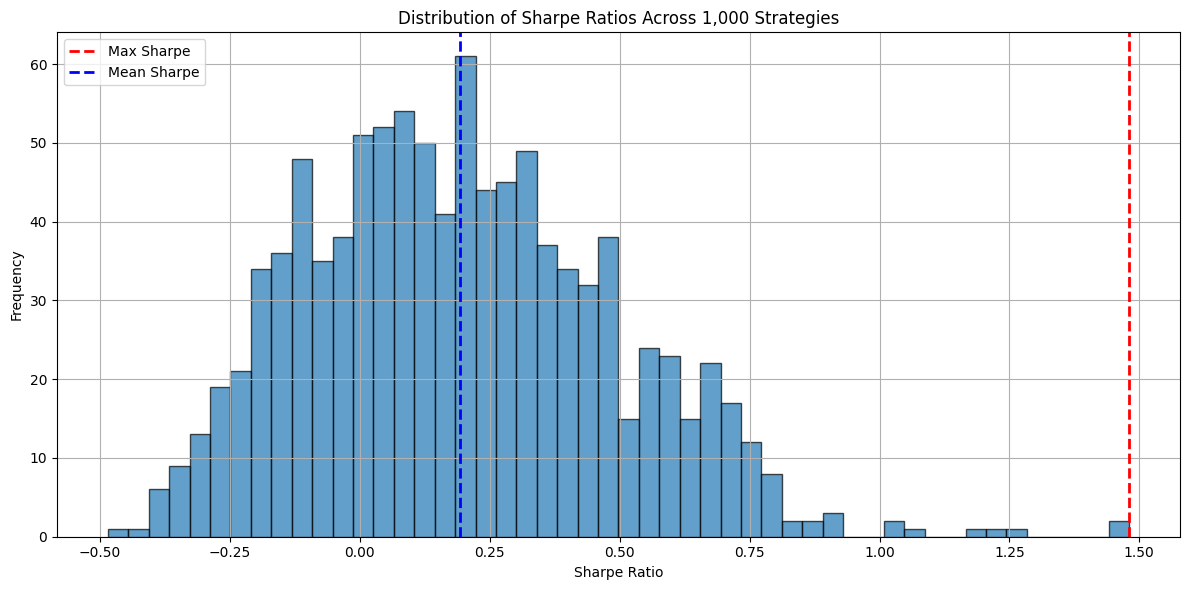

In [46]:
# b) Compute the Sharpe Ratios

def sharpe_ratio(series):
    """Compute annualized Sharpe ratio (no risk-free rate)."""
    mean_ret = series.mean()
    std_ret = series.std()
    return (mean_ret / std_ret) * np.sqrt(252) if std_ret != 0 else np.nan

# Compute Sharpe ratios for each strategy
sharpe_scores = returns_df.apply(sharpe_ratio, axis=0)

# Find the maximum Sharpe ratio
max_sharpe = sharpe_scores.max()
best_strategy = sharpe_scores.idxmax()

print(f"Maximum Sharpe Ratio: {max_sharpe:.4f}")
print(f"Best performing strategy: {best_strategy}")

import matplotlib.pyplot as plt

# Plot histogram of Sharpe ratios
plt.figure(figsize=(12, 6))
plt.hist(sharpe_scores.dropna(), bins=50, alpha=0.7, edgecolor='black')

# Add lines for max and mean Sharpe
plt.axvline(sharpe_scores.max(), color='red', linestyle='--', linewidth=2, label='Max Sharpe')
plt.axvline(sharpe_scores.mean(), color='blue', linestyle='--', linewidth=2, label='Mean Sharpe')

# Annotate
plt.title("Distribution of Sharpe Ratios Across 1,000 Strategies")
plt.xlabel("Sharpe Ratio")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
# c)Derive the expected maximum Sharpe ratio
# Compute the theoretical expected maximum Sharpe ratio under the null hypothesis of no skill

from scipy.stats import norm

def expected_max_sharpe(n_trials, mean_sr=0, std_sr=1):
    """Expected maximum Sharpe ratio under the null (False Strategy Theorem)"""
    gamma = 0.5772  # Euler–Mascheroni constant
    term1 = (1 - gamma) * norm.ppf(1 - 1 / n_trials)
    term2 = gamma * norm.ppf(1 - 1 / (n_trials * np.e))
    return mean_sr + std_sr * (term1 + term2)

# Apply to our case: 1000 strategies, mean=0, std=1
E_max_SR = expected_max_sharpe(n_trials=1000)

print(f"Expected Max Sharpe (under null): {E_max_SR:.4f}")
print(f"Observed Max Sharpe: {max_sharpe:.4f}")


Expected Max Sharpe (under null): 3.2551
Observed Max Sharpe: 1.4801


In [48]:
observed_sharpe = max_sharpe

# Compute p-value under null hypothesis
p_value = 1 - norm.cdf(observed_sharpe)

print(f"P-value of observing SR ≥ {observed_sharpe:.4f}: {p_value:.4f}")

P-value of observing SR ≥ 1.4801: 0.0694
